# 1) Tutorial DBSCAN

In [ ]:
!pip install kneed

In [ ]:
import pandas as pd

df = pd.read_csv("https://reneshbedre.github.io/assets/posts/tsne/tsne_scores.csv")
df.head(2)

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398


In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
# n_neighbors = 5 as kneighbors function returns distance of point to itself (i.e. first column will be zeros)
nbrs = NearestNeighbors(n_neighbors = 5).fit(df)
# Find the k-neighbors of a point
neigh_dist, neigh_ind = nbrs.kneighbors(df)
# sort the neighbor distances (lengths to points) in ascending order
# axis = 0 represents sort along first axis i.e. sort along row
sort_neigh_dist = np.sort(neigh_dist, axis = 0)

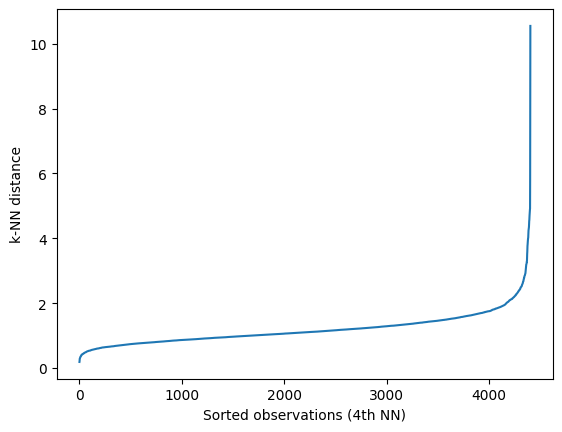

In [ ]:
import matplotlib.pyplot as plt
k_dist = sort_neigh_dist[:, 4]
plt.plot(k_dist)
plt.ylabel("k-NN distance")
plt.xlabel("Sorted observations (4th NN)")
plt.show()

In [ ]:
from kneed import KneeLocator
kneedle = KneeLocator(x = range(1, len(neigh_dist)+1), y = k_dist, S = 1.0,
                      curve = "concave", direction = "increasing", online=True)

# get the estimate of knee point
print(kneedle.knee_y)
4.5445133515748894

4.5445133515748894


4.5445133515748894

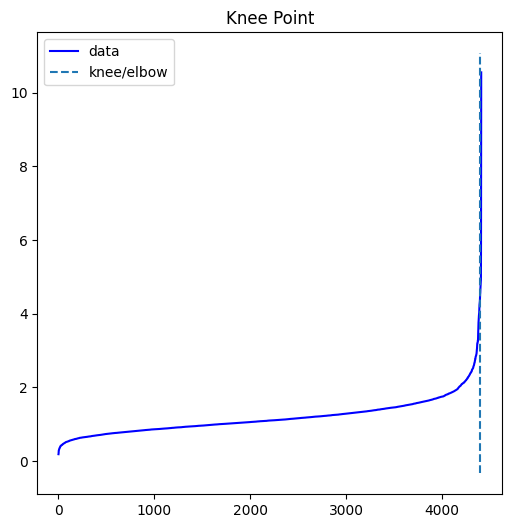

In [ ]:
kneedle.plot_knee()
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
clusters = DBSCAN(eps = 4.54, min_samples = 4).fit(df)
clusters.labels_




array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
set(clusters.labels_)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9),
 np.int64(10)}

In [ ]:
from collections import Counter
Counter(clusters.labels_)

Counter({np.int64(0): 870,
         np.int64(1): 1524,
         np.int64(2): 769,
         np.int64(3): 301,
         np.int64(4): 153,
         np.int64(5): 246,
         np.int64(6): 232,
         np.int64(7): 283,
         np.int64(8): 11,
         np.int64(9): 6,
         np.int64(10): 8,
         np.int64(-1): 3})

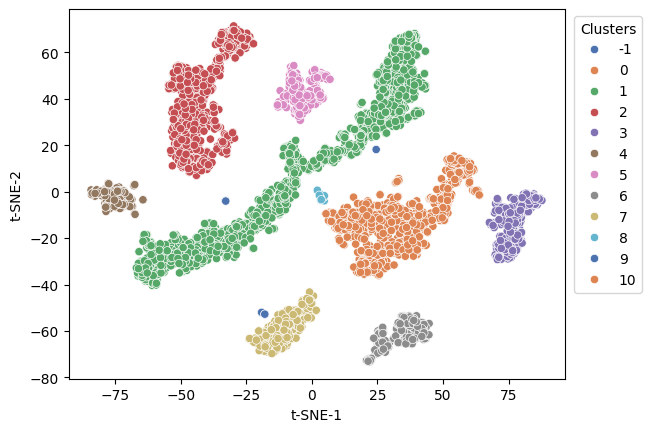

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clusters.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

# 2) Cambios al Modelo DBSCAN

## 2.1) Cambio de el Epsilon ($ε$)

In [ ]:
clustersM = DBSCAN(eps = 6.1, min_samples = 4).fit(df)
clustersM.labels_

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
set(clustersM.labels_)

{np.int64(-1),
 np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7)}

In [ ]:
Counter(clustersM.labels_)

Counter({np.int64(0): 889,
         np.int64(1): 1525,
         np.int64(2): 769,
         np.int64(3): 301,
         np.int64(4): 153,
         np.int64(5): 246,
         np.int64(6): 232,
         np.int64(7): 289,
         np.int64(-1): 2})

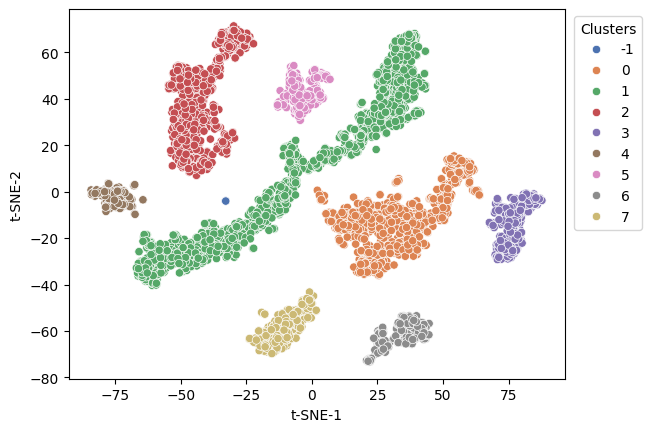

In [ ]:
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = clustersM.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

## 2.2) Cambio de Metrica para la Distancia entre los Puntos

In [154]:
cluster_m = DBSCAN(eps=0.001, min_samples=10, metric='cosine').fit(df)
cluster_m.labels_

array([0, 0, 1, ..., 2, 1, 2])

In [155]:
set(cluster_m.labels_)

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2), np.int64(3)}

In [152]:
Counter(cluster_m.labels_)

Counter({np.int64(0): 246,
         np.int64(1): 202,
         np.int64(-1): 437,
         np.int64(2): 66,
         np.int64(3): 198,
         np.int64(4): 597,
         np.int64(6): 116,
         np.int64(5): 625,
         np.int64(9): 162,
         np.int64(7): 31,
         np.int64(8): 598,
         np.int64(13): 179,
         np.int64(10): 443,
         np.int64(11): 54,
         np.int64(12): 123,
         np.int64(15): 29,
         np.int64(14): 37,
         np.int64(20): 23,
         np.int64(21): 29,
         np.int64(18): 24,
         np.int64(17): 61,
         np.int64(16): 34,
         np.int64(19): 15,
         np.int64(22): 37,
         np.int64(24): 20,
         np.int64(23): 20})

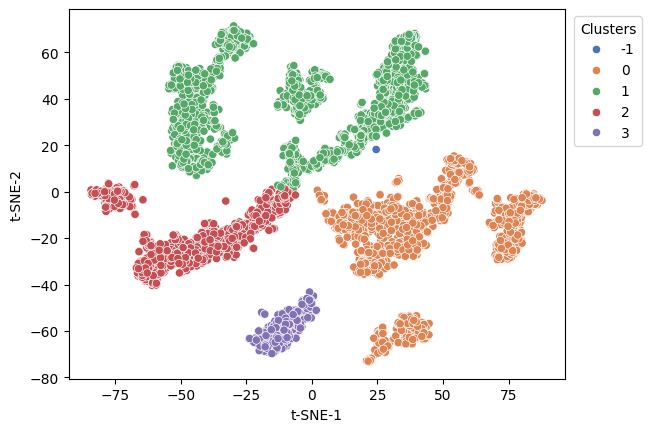

In [156]:
p = sns.scatterplot(data = df, x = "t-SNE-1", y = "t-SNE-2", hue = cluster_m.labels_, legend = "full", palette = "deep")
sns.move_legend(p, "upper right", bbox_to_anchor = (1.17, 1.), title = 'Clusters')
plt.show()

## 2.3) Comparación de las Soluciones

Considero que la mejor solución que implementa un cambio de el epsilon de forma que a mi parecer los clusters generados eran los que conforme a la grafica se pueden distinguir de forma clara a simple vista, sin ser demasiado complejos por lo que se generarorn menos clusters que en el modelo de el tutorial, sin embargo, no tan pocos como  en el ultimo modelo de distancia mediante cosenos. Así pues me parecio interesante la figura que generaron los clusters de distancia por coseno así pues se formo un patron radial, este patron podría ser util para clusters que aparentan ser uno se pueden dividir en dos cuando la region que los une se vuelve muy delgada como una franja y se enfoca más en las regiones con una densidad mayor. Pero en general considero que el modelo mas utíl es el segndo por la practicidad de los clusters que genera.